This post will briefly show how you can use the `exodus.py` script distributed with [Trilinos](http://trilinos.org) to extract data directly from an Exodus database.  Exodus is a wrapper API on NetCDF that is specifically suited for finite element data.  That is, it defines variables on nodes, elements, blocks of elements, sets of nodes, etc.  The Exodus API is provided in both C and Fortran, `exodus.py` uses `ctypes` to call into the compiled Exodus C library. 

First, I need to rearrange my install environment a little because `exodus.py` expects the NetCDF and Exodus compiled dynamic libraries to be in the same directory. On my machine they are not, so I will just create some symbolic links.  It also expects the Exodus include file to be in a folder labeled `inc`, but on my machine it is labeled `include` so again, I will just create some symbolic links.

In [1]:
%%bash
ln -sf /usr/local/netcdf/lib/libnetcdf.dylib /usr/local/trilinos/lib/.
ln -sf /usr/local/trilinos/include /usr/local/trilinos/inc

If your /usr/local is not writable, you may need to use `sudo` to create the links.  Also, I am on Mac OSX where dynamic libraries have a `.dylib` file extension.  If you use Linux, you will need to change `.dylib` above to `.so`.

We also need to add the path of `exodus.py` to the active `PYTHONPATH`.  We can do this from within the IPython session.

In [2]:
import sys
sys.path.append('/usr/local/trilinos/bin')

Now we can load the `exodus` class from `exodus.py` and instantiate a file object with a given filename.  I will use the `ViscoplasticNeedlemanFullyPrescribedTension_NoFlaw.h` Exodus history database that is output from the [*Peridigm*](http://peridigm.sandia.gov) verification test of the same name.

In [3]:
from exodus import exodus

e = exodus('ViscoplasticNeedlemanFullyPrescribedTension_NoFlaw.h', mode='r', array_type='numpy')


You are using exodus.py v 1.02 (beta), a python wrapper of some of the exodus II library.
Copyright (c) 2013,2014 Sandia Corporation. Under the terms of Contract DE-AC04-94AL85000
with Sandia Corporation, the U.S. Government retains certain rights in this software.

Opening exodus file: ViscoplasticNeedlemanFullyPrescribedTension_NoFlaw.h


Now we'll use the API calls to extract the data.  First we'll get the time step values.

In [4]:
time_steps = e.get_times()

Now we can print the global variable names.

In [5]:
e.get_global_variable_names()

['Max_Von_Mises_Stress', 'Min_Von_Mises_Stress']

And use the global variable names to extract the data from the database.  Since we used `array_type='numpy'` when we instantiated the file object above.  The data is stored in numpy arrays.

In [6]:
vm_max = e.get_global_variable_values('Max_Von_Mises_Stress')
vm_min = e.get_global_variable_values('Min_Von_Mises_Stress')

Because in this example test we load at a constant strain-rate, we can easily convert the time-steps to engineering strain.

In [7]:
eng_strain_Y = time_steps * 0.001 / 1.0e-8

Now we can create a stress-strain curve

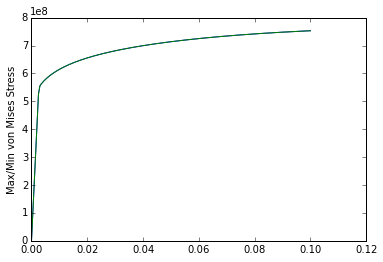

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(eng_strain_Y, vm_max, eng_strain_Y, vm_min);
plt.ylabel("Max/Min von Mises Stress");

I don't want the symbolic links I created earlier to cause any unexpected trouble for me later, so I will remove them.

In [9]:
%%bash
rm /usr/local/trilinos/lib/libnetcdf.dylib
rm /usr/local/trilinos/inc